In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Mall_data=pd.read_csv('Mall_Customers.csv')
Mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
Mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
Mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Gender', ylabel='count'>

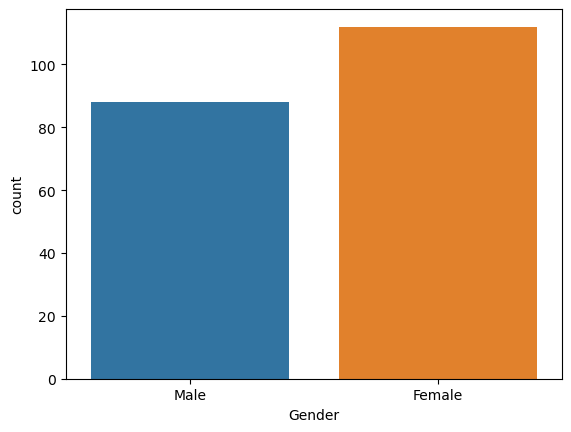

In [5]:
sns.countplot(data=Mall_data,x='Gender')

([<matplotlib.patches.Wedge at 0x21f9b248490>,
 [Text(-0.20611945413751356, 1.080515974257694, 'FEMALE'),
  Text(0.20611945413751367, -1.080515974257694, 'MALE')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

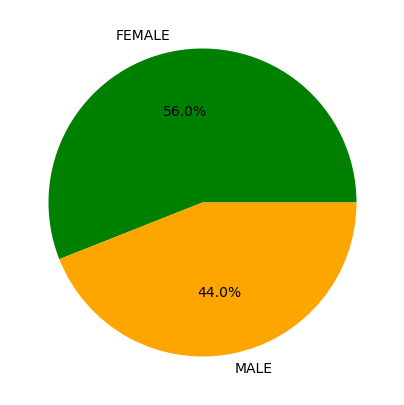

In [6]:
plt.figure(figsize=(5,5))
plt.pie(Mall_data['Gender'].value_counts(),
        colors=['green','orange'],
        labels=['FEMALE','MALE'],
        autopct='%.1f%%')

<Axes: xlabel='Age', ylabel='Count'>

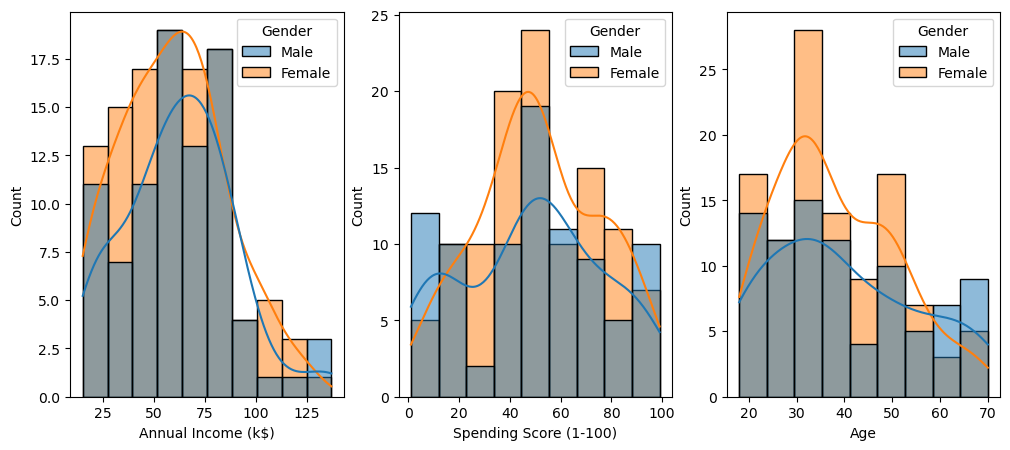

In [7]:
figure, axes=plt.subplots(1,3,figsize=(12,5))
sns.histplot(data=Mall_data,x='Annual Income (k$)',hue='Gender',kde=True,ax=axes[0])
sns.histplot(data=Mall_data,x='Spending Score (1-100)',hue='Gender',kde=True,ax=axes[1])
sns.histplot(data=Mall_data,x='Age',hue='Gender',kde=True,ax=axes[2])

C:\Users\User\anaconda\envs\mbdiploma\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


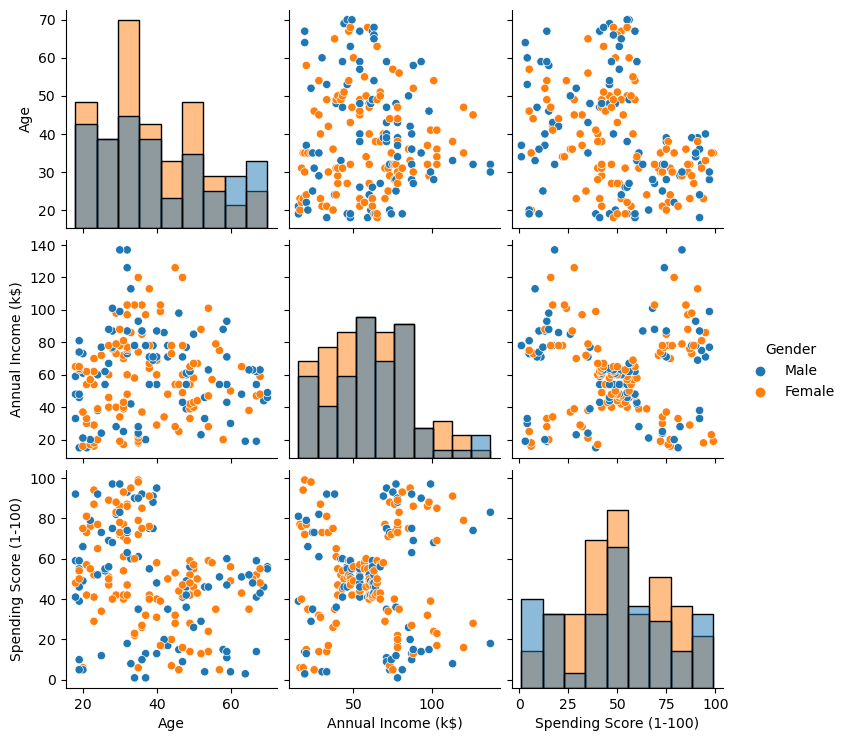

In [8]:
sns.pairplot(data=Mall_data,x_vars=["Age",'Annual Income (k$)','Spending Score (1-100)'],
                            y_vars=["Age",'Annual Income (k$)','Spending Score (1-100)'],hue='Gender',diag_kind='hist')

<Axes: xlabel='Age', ylabel='count'>

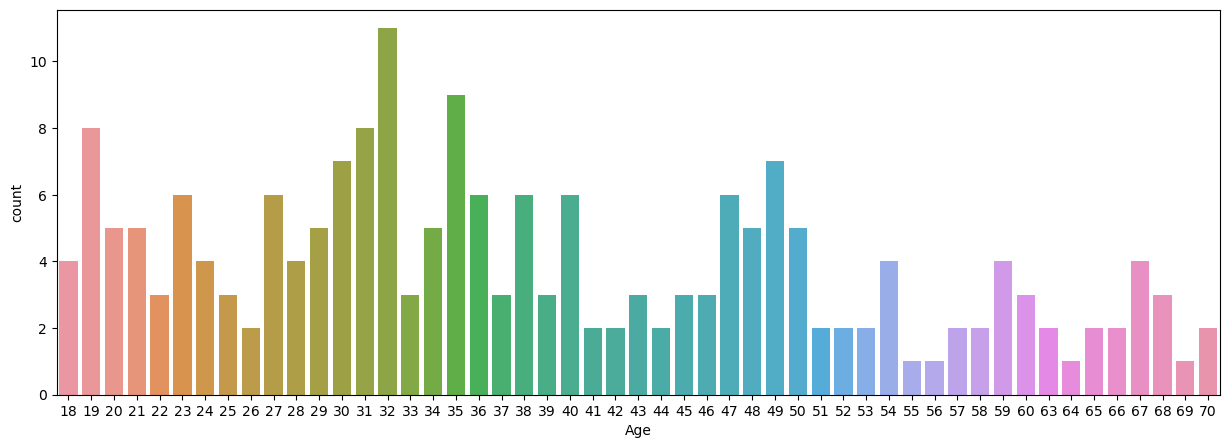

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(data=Mall_data,x='Age')

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

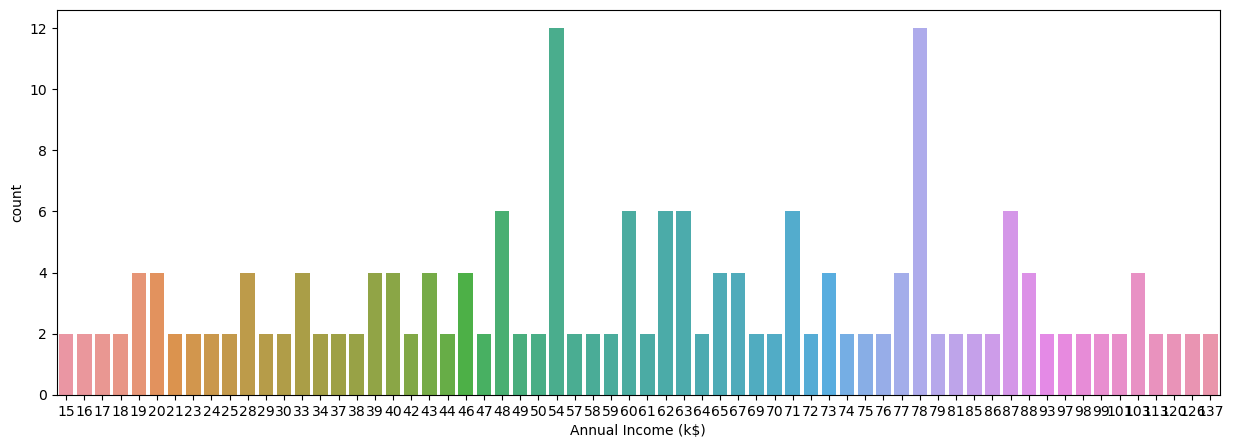

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=Mall_data,x='Annual Income (k$)')

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

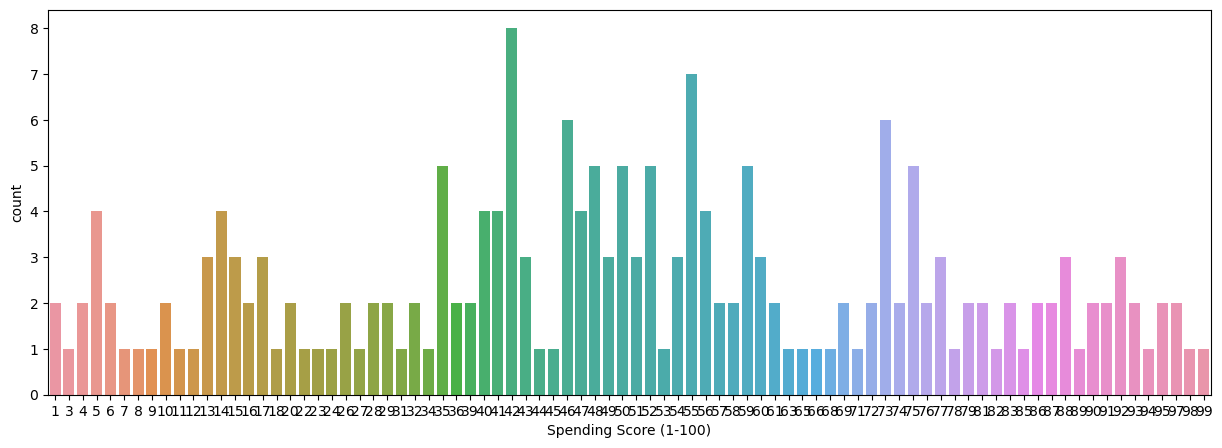

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=Mall_data,x='Spending Score (1-100)')

In [12]:
data1=Mall_data.iloc[:,[3,4]]
data1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.cluster import KMeans
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,
                   random_state=42)
    kmeans.fit(data1)
    sse.append(kmeans.inertia_)

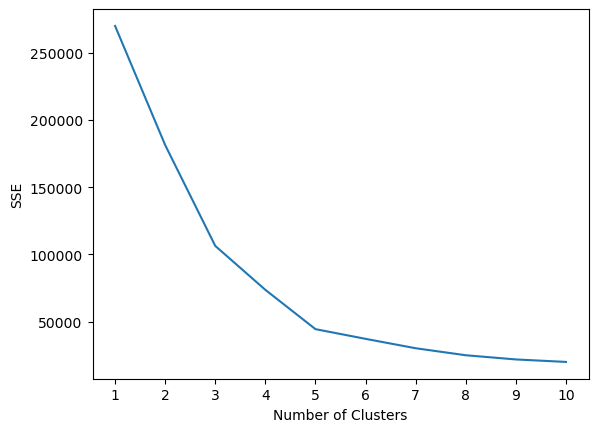

In [15]:
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5,n_init=10,
               random_state=42)
kmeans.fit(data1)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [17]:
print("SSE:",kmeans.inertia_)
print("Centroid:",kmeans.cluster_centers_)
print("Iteration:",kmeans.n_iter_)

SSE: 44448.45544793371
Centroid: [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
Iteration: 4


In [18]:
cluster_pred=kmeans.predict(data1)
cluster_pred[0:100]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

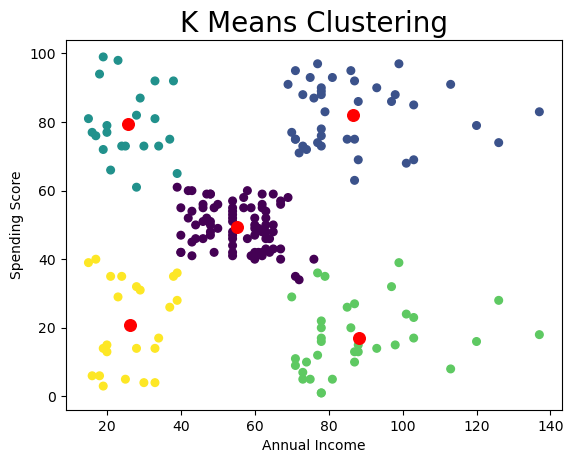

In [20]:
plt.plot(figsize=(12,7))
plt.scatter(data1['Annual Income (k$)'],data1['Spending Score (1-100)'],s=30,c=cluster_pred,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=70)
plt.title('K Means Clustering',fontsize=20)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [21]:
Mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
data2=Mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]
data2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10,
                   random_state=42)
    kmeans.fit(data2)
    sse.append(kmeans.inertia_)

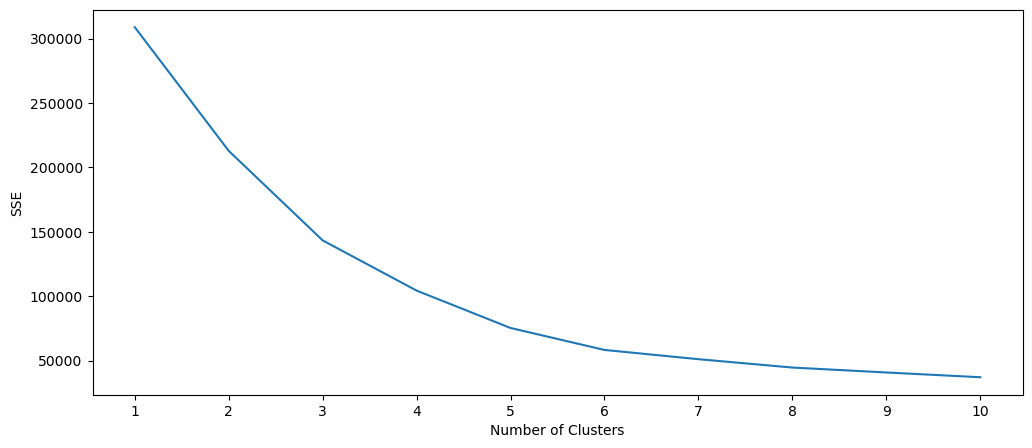

In [25]:
plt.figure(figsize=(12,5))
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [27]:
kmeans=KMeans(n_clusters=6,n_init=10,
             random_state=42)
kmeans.fit(data2)
print("SSE:",kmeans.inertia_)
print("Centroid:",kmeans.cluster_centers_)
print("Iteration:",kmeans.n_iter_)

SSE: 58300.44332159069
Centroid: [[56.15555556 53.37777778 49.08888889]
 [41.68571429 88.22857143 17.28571429]
 [25.27272727 25.72727273 79.36363636]
 [27.         56.65789474 49.13157895]
 [32.69230769 86.53846154 82.12820513]
 [44.14285714 25.14285714 19.52380952]]
Iteration: 4


In [1]:
import plotly.express as px
fig = px.scatter_3d(
    data2,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=kmeans.labels_.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title="Clusters in Age-Annual Income-Spending Score",
    color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

NameError: name 'data2' is not defined